In [36]:
#センサデータを読み込んで、それを整形した表をつくる。その後、その表をもとにlidarデータをヒストグラム化

#必要なものいろいろインポートするでー
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#センサデータを読み込んでそれを離散的な確率分布（確率質量関数分布）化するclass
class Sensor_Data:
    
    #違うセンサデータファイルでもclassのメソッドを使えるように初期化
    def __init__(self, file_name, delimiter, header, time, sensor1, probs):
        self.file_name = file_name #ファイルの名前
        self.delimiter = delimiter #delimiter…txtファイルで、隣り合うデータの区切り。半角スペースが多いかも
        self.header = header #ファイルのヘッダー
        #self.date = date #txtファイルで記録している日付
        self.time = time #テキストファイルで記録している時間
        self.sensor1 = sensor1 #テキストファイルで記録したsensor
        #self.sensor2 = sensor2
        self.probs = probs #表を回数→確率にするときに使う。（表の項目設定に使う。）
    
    #センサデータを読み込んで、それを表にする関数
    #引数はclass内ですでに定義されたものだけを使うのでselfだけよん
    def sensor_read_all(self):
        data = pd.read_csv(self.file_name, self.delimiter, self.header, names = (self.time, self.sensor1))
        return data
    
    #時系列データをプロットしてグラフにする関数
    def all_time_series(self):
        #x = read_data[self.time] #read_dataから横軸にしたい量である時間を取得
        #y = read_data[self.sensor1] #read_dataから縦軸にしたい量である磁気強度を取得
        #plt.ticker.StrMethodFormatter("{x:.6f}")
        plt.plot(read_data[self.time], read_data[self.sensor1]) #横軸をts、縦軸をmzsとしてぷろっとぷろっとー！！
        plt.xlim(read_data[self.time].min(), read_data[self.time].max())
        plt.xlabel('time(microsec)')
        plt.ylabel('mz')
        plt.show() #プロットしたグラフを表示
        
    def sns_time_series(self):
        sns.lineplot(data=read_data[self.sensor1])
        plt.show()
    
    #ヒストグラムのビンの数を計算する関数
    def caluc_bins(self):
        data_max = read_data[self.sensor1].max()
        data_min = read_data[self.sensor1].min()
        bins1 = data_max - data_min
        bins2 = bins1 * 10 ** 6
        return bins2
    
    
    #上でつくった表からsensorごとにヒストグラム化する関数
    #引数は、selfとヒストグラム化したいセンサの名前
    def sensor_hist(self,bin_num):
        #read_data[sensor].hist(bins=max(read_data[sensor])*10**6- min(read_data[sensor])*10**6, align="left") 
        #binsは整数値じゃなきゃだめだから、磁気強度の値をこっちか記録時で定数倍しておく必要あり
        read_data[self.sensor1].hist(bins=bin_num) #binsで指定した数をbinの個数としたヒストグラムができる
        plt.show()
        
    #あるセンサデータの値が観測された回数と確率を表にする関数
    def sensor_freqs(self):
        #read_dataに保存した観測されたデータ数を数えて、それを表にする
        freqs = pd.DataFrame(read_data[self.sensor1].value_counts())
        
        #上の表に、観測された回数を確率に直した段を加える
        freqs[self.probs] = freqs[self.sensor1]/len(read_data[self.sensor1])
        
        freqs_sort = freqs[self.probs].sort_index()
        #上の表だとセンサ値の昇順ではなく、回数の昇順になっている
        #1列目をセンサ値を昇順にして、2列目をそのセンサ値が観測される確率にして返す
        
        return pd.DataFrame(freqs_sort)
        
        #表を横向きにして返す
        #return freqs.transpose().sort_index()
    
    #sensor_freqsで作った表をヒストグラムにする関数
    def sensor_hist_freqs(self, bins_num):
        #return read_data_freqs[self.probs].sort_index().plot.bar()
        read_data_freqs_T[self.probs].hist(bins=bins_num)
    
    #sensor_freqsで取得した表を、横軸：センサ値、縦軸；確率としたグラフ
    #つまり、離散的確率分布
    def sensor_probs(self):
        plt.rcParams["figure.figsize"] = (14, 8)
        read_data_freqs2.plot.bar()
        plt.xlabel('mz') #x軸をmzに
        plt.ylabel('probs') #y軸をprobs(確率)に
        plt.show() #ひょうじー！！！！
        
        #return read_data_freqs2.plot.bar()
    
    #センサデータから平均値、分散、最大値、最小値を求める
    def sensor_caluc_para(self):
        mean = read_data[self.sensor1].mean()
        var = read_data[self.sensor1].var() #不偏分散
        std = read_data[self.sensor1].std()
        mz_min = read_data[self.sensor1].min() #最小値
        mz_max = read_data[self.sensor1].max() #最大値
        print("mean:"+str(mean), "var:"+str(var), "std:"+str(std), "mz_min:"+str(mz_min), "mz_max:"+str(mz_max))
    
    #センサデータから平均値と分散を求めて、正規分布にする関数
    def sensor_normal(self):
        #平均値を求める
        mean = read_data[self.sensor1].mean()
        mean_6 = mean * 10 ** 6
        #分散を求める
        var = read_data[self.sensor1].var() #不偏分散
        var_6 = var * 10 ** 6
        #標準偏差ももとめるよ
        std = read_data[self.sensor1].std()
        
        #正規分布の範囲きめるー
        #平均値から±標準偏差の10倍にして、それを0.0001間隔でプロット
        zs = np.arange(mean - 10 * std, mean + 10 * std, 0.0001)
        plt.plot(zs,stats.norm.pdf(zs, loc=mean, scale=std)) #locで平均値。stdで標準偏差を指定するよう
        plt.plot
        
#sns.distplotで,table_nameで指定したデータのヒストグラムを書く。bins1でヒストグラムのビンの数を指定
    def sns_hist_pdf(self,data_name,bins1):
        sns.histplot(data_name[self.sensor1],bins=bins1)
        plt.show()
        
    #箱ひげ図
    def box_fig(self):
        sns.boxplot(y=read_data[self.sensor1], width=0.3, data=read_data)
        plt.show()

        
#インスタンス化
#sensor_data = Sensor_Data("3DM-DH_center_gnu_0625_1st.txt", " ", None, "time", "3DM-DH_center_0625_1st", "Probs")

#表を生成
#read_data = sensor_data.sensor_read_all()

#表を出力
#read_data


In [37]:
#インスタンス化
sensor_data = Sensor_Data("3DM-DH_right_gnu_0625_1st.txt", " ", None, "time", "3DM-DH_right_0625_1st", "Probs")

#表を生成
read_data = sensor_data.sensor_read_all()

#表を出力
read_data

,time,3DM-DH_right_0625_1st
0,5.528947e+10,0.639831
1,5.528947e+10,0.639831
2,5.528947e+10,0.639831
3,5.528947e+10,0.639831
4,5.528947e+10,0.639831
...,...,...
16070492,5.710721e+10,0.639060
16070493,5.710721e+10,0.639060
16070494,5.710721e+10,0.639060
16070495,5.710721e+10,0.639060


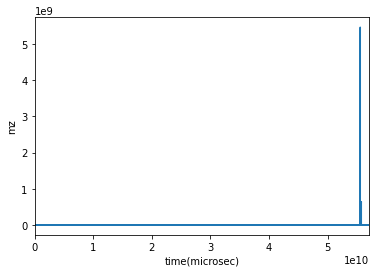

In [38]:
#read_dataを時系列（Time series）グラフ化
sensor_data.all_time_series()

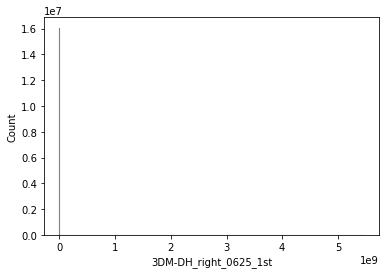

In [27]:
#seabornによるread_dataのヒストグラム
sensor_data.sns_hist_pdf(read_data, 500)

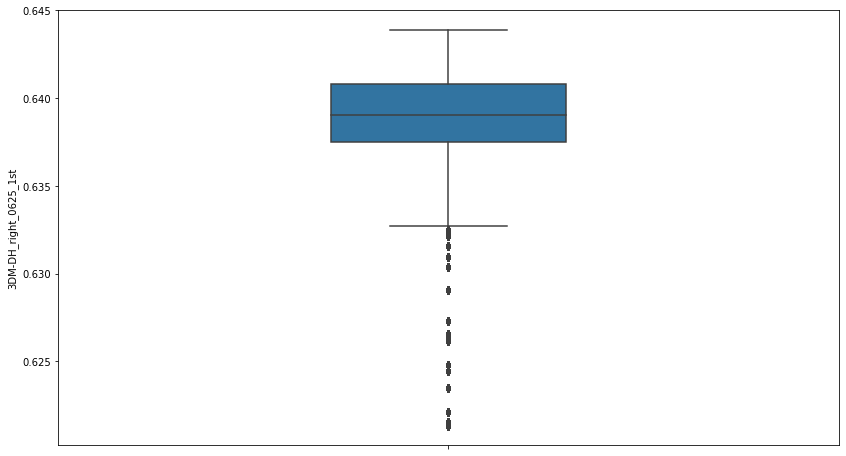

In [110]:
#箱ひげ図
sensor_data.box_fig()

In [114]:
#1列目がセンサ値、2列目がそのセンサ値が観測される確率の表を出力
read_data_freqs2 = sensor_data.sensor_freqs()
read_data_freqs2

,Probs
0.621341,0.000051
0.621533,0.000050
0.622111,0.000052
0.623459,0.000052
0.624422,0.000052
...,...
0.643105,0.001898
0.643297,0.000719
0.643490,0.000260
0.643683,0.000100


In [118]:
#calculate sum of bin（スタージェスの公式）
n = len(read_data_freqs2["Probs"])
m = 1 + np.log2(n)
print(m)

7.189824558880018


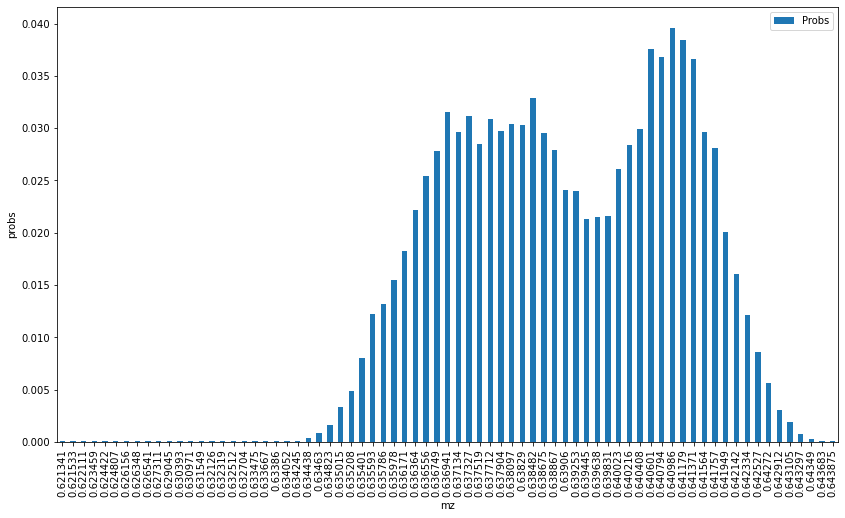

In [85]:
#確率質量分布(probability mass function)を表示
sensor_mass_dist = sensor_data.sensor_probs()
sensor_mass_dist

In [86]:
sensor_data.sensor_caluc_para()

mean:0.6390883842339692 var:4.04507169592291e-06 std:0.002011236360034024 mz_min:0.621341 mz_max:0.643875


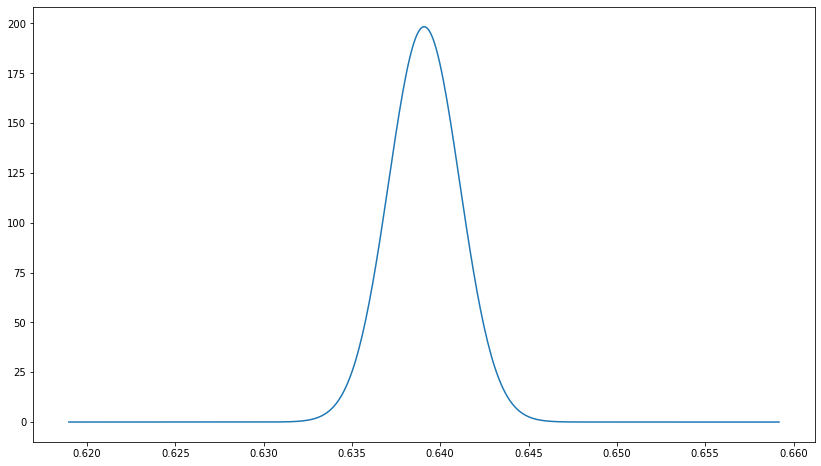

In [87]:
#計測データから求めた平均値と標準偏差を使って正規分布を作成
#Gauss distribution by using mean and std calculated raw data
sensor_data.sensor_normal()

In [88]:
bins_num = int(sensor_data.caluc_bins())
print(bins_num)

22533


In [89]:
sensor_data.caluc_bins()

22533.99999999994

In [139]:
#インスタンス化(車が１台も通らない、自転車は１台だけ通るとき)
sensor_data = Sensor_Data("3DM-DH_right_gnu_0706_2nd.txt", " ", None, "time", "3DM-DH_right_0706_2nd", "Probs")

#表を生成
read_data = sensor_data.sensor_read_all()

#表を出力
read_data

,time,3DM-DH_right_0706_2nd
0,11054585741,0.621533
1,11054585984,0.621533
2,11054586211,0.621533
3,11054586419,0.621533
4,11054586627,0.621533
...,...,...
8408198,12857938230,0.620185
8408199,12857938442,0.620185
8408200,12857938659,0.620185
8408201,12857938905,0.620185


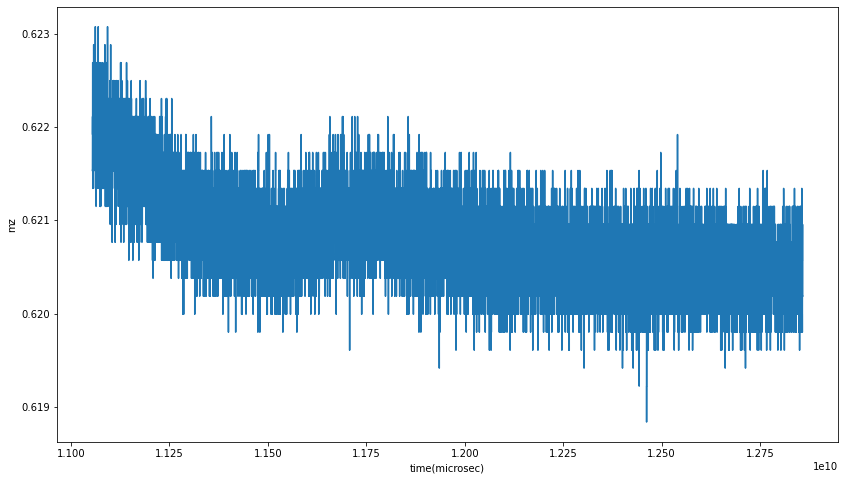

In [140]:
#read_dataを時系列(Time series)グラフ化
sensor_data.all_time_series()

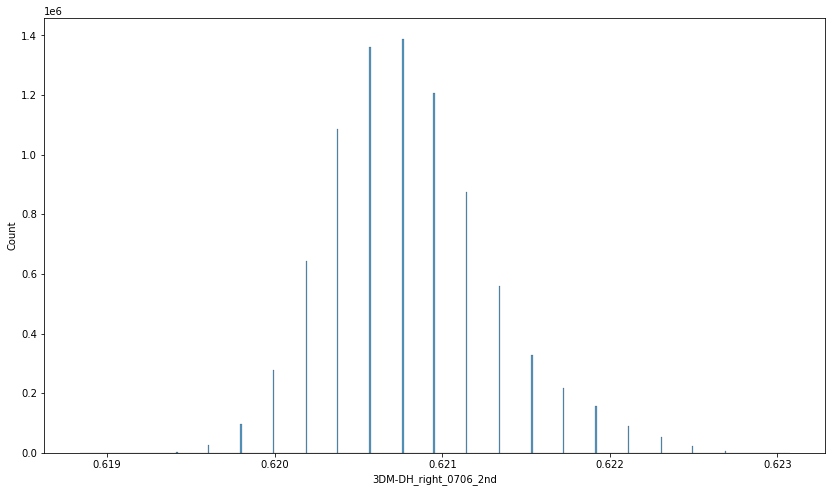

In [144]:
#seabornによるread_dataのヒストグラム
sensor_data.sns_hist_pdf(read_data, bins1=500)

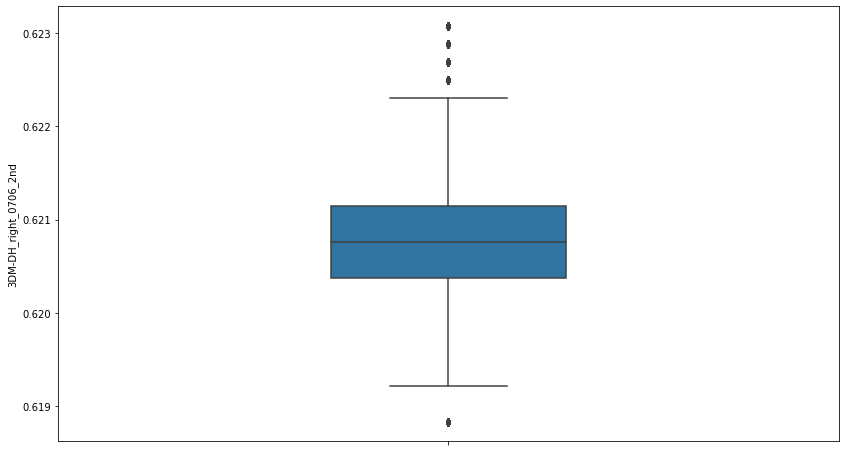

In [145]:
#箱ひげ図
sensor_data.box_fig()

In [146]:
#1列目がセンサ値、2列目がそのセンサ値が観測される確率の表を出力
read_data_freqs2 = sensor_data.sensor_freqs()
read_data_freqs2

,Probs
0.618837,0.000051
0.619222,0.000157
0.619415,0.000415
0.619607,0.003004
0.619800,0.011497
0.619992,0.032960
0.620185,0.076658
0.620377,0.129291
0.620570,0.161998
0.620763,0.165157


In [147]:
n = len(read_data_freqs2['Probs'])
bins2 = 1 + np.log2(n)
print(bins2)

5.459431618637297


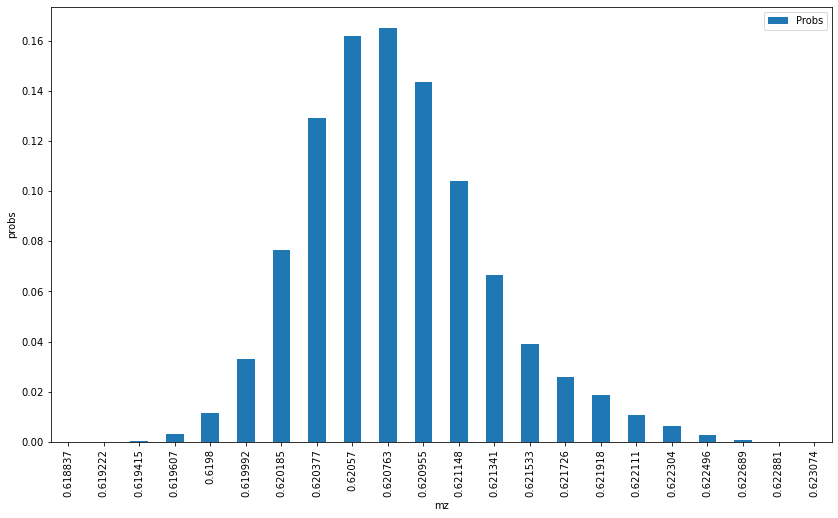

In [148]:
#確率質量分布(probability mass function)を表示
sensor_mass_dist = sensor_data.sensor_probs()
sensor_mass_dist

In [149]:
sensor_data.sensor_caluc_para()

mean:0.6208105639936141 var:2.465353859748197e-07 std:0.0004965232985216501 mz_min:0.618837 mz_max:0.623074


In [3]:
#インスタンス化（車が6台くらい、自転車もけっこう通る）
sensor_data = Sensor_Data("3DM-DH_left_gnu_0706_1st.txt", " ", None, "time", "3DM-DH_left_0706_1st", "Probs")

#表を生成
read_data = sensor_data.sensor_read_all()

#表を出力
read_data

,time,3DM-DH_left_0706_1st
0,65576432007,0.617103
1,65576432268,0.617103
2,65576432476,0.617103
3,65576432683,0.617103
4,65576432890,0.617103
...,...,...
8425949,67379870873,0.614214
8425950,67379871065,0.614214
8425951,67379871235,0.614214
8425952,67379871415,0.614214


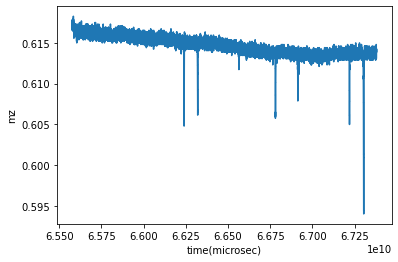

In [4]:
#read_dataを時系列グラフ化
sensor_data.all_time_series()

In [5]:
#seabornによるread_dataのヒストグラム
sensor_data.sns_hist_pdf(read_data,bins1=500)

AttributeError: module 'seaborn' has no attribute 'histplot'

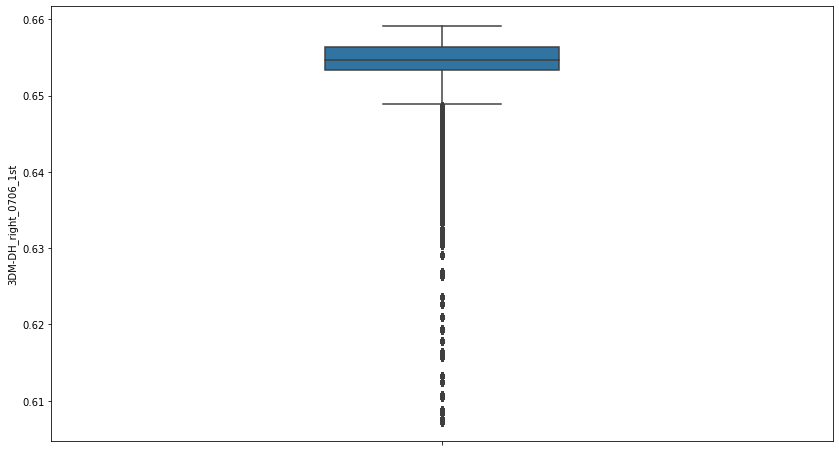

In [153]:
#箱ひげ図
sensor_data.box_fig()

In [154]:
#1列目がセンサ値、2列目がそのセンサ値が観測される確率の表を出力
read_data_freqs2 = sensor_data.sensor_freqs()
read_data_freqs2

,Probs
0.607280,0.000052
0.607473,0.000052
0.607666,0.000051
0.608436,0.000052
0.608821,0.000052
...,...
0.658320,0.003405
0.658513,0.001130
0.658706,0.000406
0.658898,0.000102


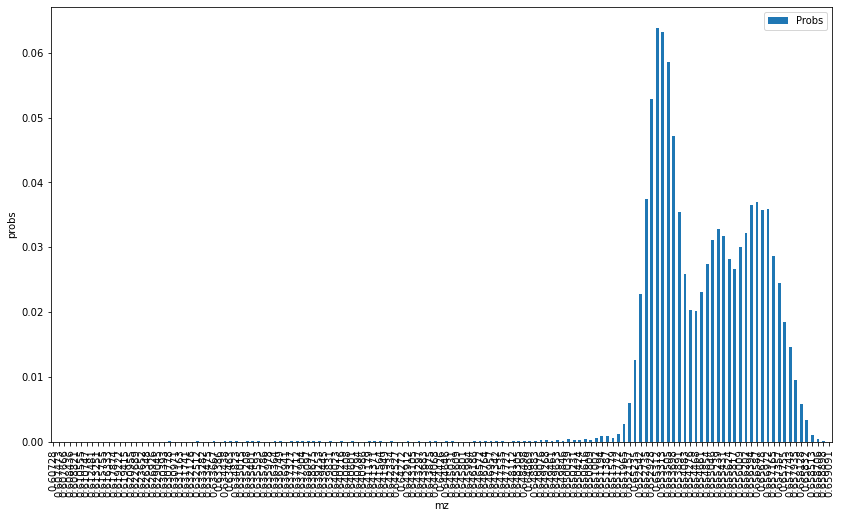

In [155]:
#確率質量分布(probability mass function)を表示
sensor_mass_dist = sensor_data.sensor_probs()
sensor_mass_dist

In [103]:
sensor_data.sensor_caluc_para()

mean:0.6546888624028162 var:5.928382042266484e-06 std:0.002434826901910377 mz_min:0.60728 mz_max:0.659091


In [156]:
n = len(read_data_freqs2['Probs'])
bins2 = 1 + np.log2(n)
print(bins2)

8.139551352398794


In [26]:
print(read_data_freqs2.max())

Probs    0.063836
dtype: float64
